In [8]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [9]:
# define State
class BMI_state(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float

In [11]:
#define your graph
graph = StateGraph(BMI_state)

In [13]:
def calculate_bmi(state: BMI_state) -> BMI_state:
    height = state['height_m']
    weight = state['weight_kg']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    return state

In [ ]:
# add nodes to graph
graph.add_node('calc_bmi', calculate_bmi)

In [15]:
# add edges to graph
graph.add_edge(START, 'calc_bmi')
graph.add_edge('calc_bmi', END)

In [18]:
#compile the graph
workflow = graph.compile()

In [19]:
#execute
input = {'weight_kg': 80, "height_m": 1.73}
output = workflow.invoke(input)
print(output)


{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}


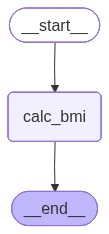

In [20]:
# to view your graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())